In [22]:
import datajoint as dj
from u19_pipeline import lab, reference, subject, action, task, acquisition, behavior

In [3]:
f = dj.Diagram(lab)

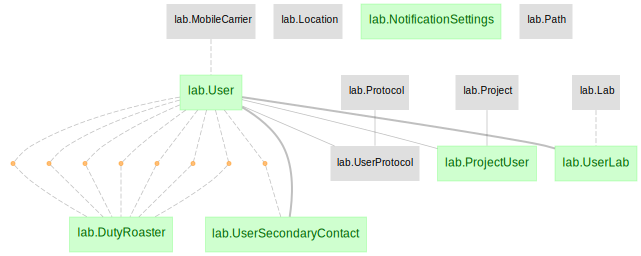

In [4]:
f

In [5]:
f.save('/images/lab_erd.png')

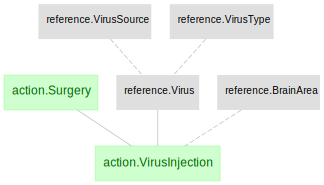

In [7]:
f = dj.Diagram(reference.Virus)+1-1
f

In [8]:
f.save('/images/reference_erd.png')

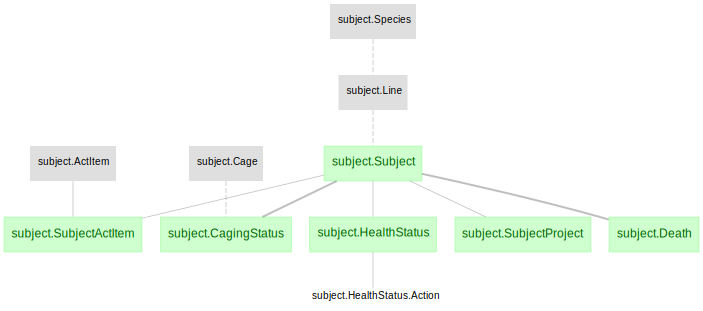

In [13]:
f = dj.Diagram(subject) - subject.Source - subject.Allele - \
    subject.SequenceType - subject.Sequence - subject.AlleleSequence - \
    subject.LineAllele - subject.GenotypeTest - subject.Zygosity - \
    subject.BreedingPair - subject.Litter - subject.Strain - subject.LitterSubject - subject.Weaning
f

In [14]:
f.save('/images/subject_erd.png')

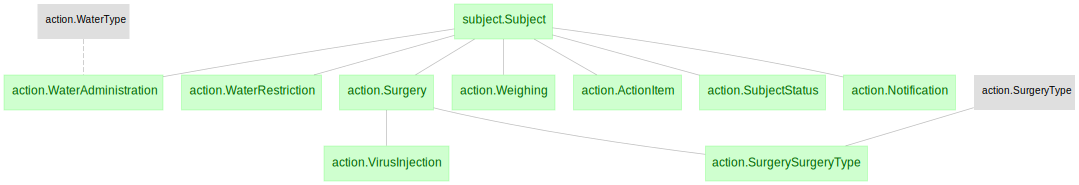

In [15]:
f = dj.Diagram(action) + subject.Subject
f

In [16]:
f.save('/images/action_erd.png')

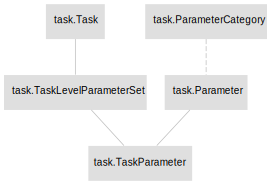

In [17]:
f = dj.Diagram(task)
f

In [18]:
f.save('/images/task_erd.png')

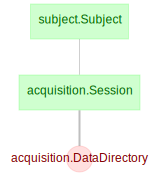

In [24]:
f = dj.Diagram(acquisition) + subject.Subject
f

In [25]:
f.save('/images/acquisition_erd.png')

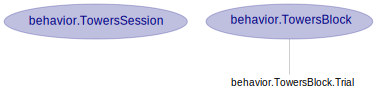

In [23]:
f = dj.Diagram(behavior)
f

In [40]:
f.save('/images/behavior_erd.png')